In [1]:
from pycaret.classification import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datarisck.csv')

In [4]:
df.keys()

Index(['inadimplente', 'util_linhas_inseguras', 'idade',
       'vezes_passou_de_30_59_dias', 'razao_debito', 'salario_mensal',
       'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',
       'numero_emprestimos_imobiliarios',
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes'],
      dtype='object')

In [7]:
s = setup(df[['inadimplente', 'util_linhas_inseguras', 'idade',
       'vezes_passou_de_30_59_dias', 'razao_debito', 'salario_mensal',
       'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',
       'numero_emprestimos_imobiliarios',
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes']]
,target = "inadimplente"
,numeric_features = ['vezes_passou_de_30_59_dias',
'numero_vezes_passou_90_dias',
'numero_de_vezes_que_passou_60_89_dias',
'numero_de_dependentes']
,normalize = True
,normalize_method = "minmax"
,data_split_stratify = True
,fix_imbalance = True,
)

,Description,Value
0,session_id,7892
1,Target,inadimplente
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(110000, 11)"
5,Missing Values,True
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best = compare_models(fold = 5, sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9299,0.8458,0.3116,0.4626,0.3720,0.3364,0.3439,0.7400
rf,Random Forest Classifier,0.9280,0.8315,0.2689,0.4357,0.3322,0.2964,0.3063,6.2780
et,Extra Trees Classifier,0.9271,0.8240,0.2804,0.4284,0.3387,0.3019,0.3097,7.2020
gbc,Gradient Boosting Classifier,0.9201,0.8208,0.3919,0.3993,0.3953,0.3525,0.3527,8.4300
ada,Ada Boost Classifier,0.9003,0.8087,0.4686,0.3276,0.3852,0.3329,0.3394,2.0800
qda,Quadratic Discriminant Analysis,0.6451,0.7858,0.7629,0.1368,0.2304,0.1323,0.2109,0.1540
lr,Logistic Regression,0.7117,0.7704,0.6662,0.1430,0.2355,0.1413,0.2055,1.5780
nb,Naive Bayes,0.9205,0.6953,0.1389,0.3268,0.1766,0.1445,0.1674,0.1020
lda,Linear Discriminant Analysis,0.6566,0.6943,0.6183,0.1147,0.1935,0.0914,0.1443,0.1940
knn,K Neighbors Classifier,0.8327,0.6801,0.4131,0.1769,0.2477,0.1703,0.1898,4.8720


In [9]:
lightgbm = create_model('lightgbm', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9295,0.8445,0.3041,0.4568,0.3651,0.3294,0.3371
1,0.9300,0.8441,0.2992,0.4610,0.3629,0.3276,0.3362
2,0.9262,0.8473,0.3281,0.4298,0.3722,0.3337,0.3371
3,0.9319,0.8408,0.3135,0.4835,0.3804,0.3461,0.3552
4,0.9318,0.8521,0.3129,0.4820,0.3794,0.3451,0.3541
Mean,0.9299,0.8458,0.3116,0.4626,0.3720,0.3364,0.3439
SD,0.0021,0.0038,0.0099,0.0196,0.0072,0.0078,0.0088


In [10]:
tuned_lightgbm =tune_model(lightgbm
,fold = 5
,custom_grid = {
   "learning_rate":[0.1, 0.2, 0.5]
   ,"num_iterations":[100, 500, 1000]
   ,"min_data_in_leaf":[10, 20, 50]
   ,"max_depth":[1, 3, 9]
}
,optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9342,0.8411,0.2164,0.5139,0.3045,0.2759,0.3047
1,0.9346,0.8435,0.2212,0.5218,0.3107,0.2823,0.3112
2,0.9316,0.8473,0.2327,0.4742,0.3122,0.2806,0.3005
3,0.9351,0.8451,0.2376,0.5293,0.3280,0.2990,0.3257
4,0.9356,0.8522,0.2339,0.5393,0.3263,0.2980,0.3270
Mean,0.9342,0.8458,0.2284,0.5157,0.3164,0.2872,0.3138
SD,0.0014,0.0037,0.0081,0.0224,0.0092,0.0095,0.0108


In [11]:
print(tuned_lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=3,
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=10, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_iterations=500, num_leaves=31, objective=None,
               random_state=7892, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


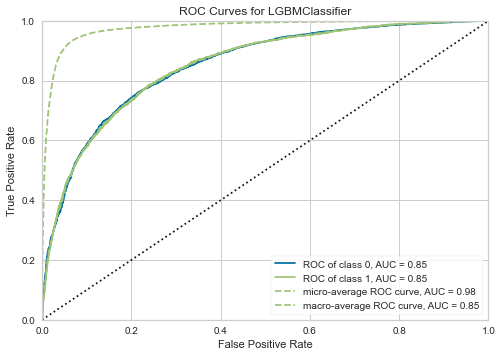

In [12]:
plot_model(tuned_lightgbm, plot = 'auc')

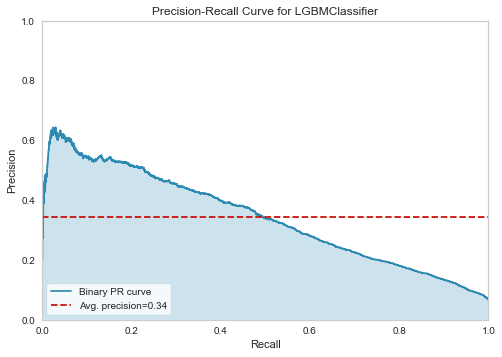

In [13]:
plot_model(tuned_lightgbm, plot = 'pr')

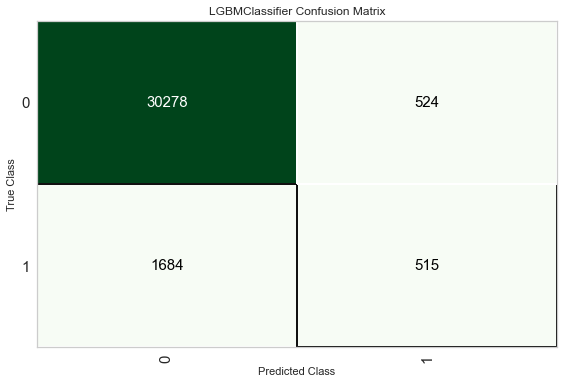

In [14]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')